## GDD/KDD CSV generation
Generate CSV with GDD/KDD values for all years

In [1]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline
import time
import glob
import seaborn as sns

# Figure factory 
import plotly 
import plotly.figure_factory as ff
import geopandas

import requests
import plotly.express as px
#from urllib3.request import urlopen
import json
import requests
import urllib

# Get county info for plotting 
response = urllib.urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
counties = json.load(response)


df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

In [2]:
#GDD and KDD functions
def KDD_fn(x, threshold):
    if x < threshold:
        return 0
    if x >= threshold:
        return x - threshold
def GDD_fn(x, t1, t2):
    if x <t1:
        return 0
    if t1<=x<t2:
        return x-t1
    if x>=t2:
        return 24

In [3]:
state = "Nebraska"
state2 = "Iowa"
state3 = "Kansas"
states = [state.upper(), state2.upper(), state3.upper()]
county_yield = pd.read_csv("../../data/data_yield/USA_county_yield_gsw.csv")
state_yield = county_yield.loc[county_yield['State'] == state.upper()]
filenames = glob.glob("/Users/julianschmitt/Downloads/Direcho/processed/*/*") # get all processed files
counties = np.unique([str("_".join(file.split("_")[1:3])) for file in filenames])

In [23]:
def KDD_GDD(counties, years):
    KDD_rep = pd.DataFrame([], columns=["year","state","county","KDD","GDD"])
    for ii in range(len(years)):
        for i in range(len(counties)):
            single_county = [elt for elt in filenames if counties[i] in elt]
            county_KDD, county_GDD = [], []
            for filename in single_county:
                try: # catch if file does not cooperate
                wind = pd.read_csv(filename)
                except:
                    continue
                wind["Year"] = [int(yr) for yr in wind["Year"]]
                wind = wind.loc[(wind["Month"]<=10) & (wind["Month"]>=4)] # filter months
                wind = wind.loc[wind["Year"]==years[ii]] # filter year
                #wind = wind.loc[wind['Month']==1]
                wind = wind[["Year","Month","Day","Hour","temp_10"]]
                wind = pd.DataFrame(wind.groupby(["Year","Month","Day"])['temp_10'].max())
                year, month, day = [elt[0] for elt in wind.index],[elt[1] for elt in wind.index], \
                                    [elt[2] for elt in wind.index]
                temp_10 = [elt[0] for elt in wind.values]
                wind = pd.DataFrame({"Year":year, "Month":month, "Day":day, 'temp_10':temp_10})
                KDD = sum([KDD_fn(x, 32) for x in wind['temp_10'].values if type(x) != type(None)])
                GDD = sum([GDD_fn(x, 8,32) for x in wind['temp_10'].values if type(x) != type(None)])
                county_KDD.append(KDD)
                county_GDD.append(GDD)
            KDD_mean = np.mean([KDD for KDD in county_KDD if KDD !=0])
            GDD_mean = np.mean([GDD for GDD in county_GDD if GDD !=0])
            state, county = counties[i].split("_")[0], counties[i].split("_")[1]
            KDD_rep = KDD_rep.append({"year":years[ii], "state":state, "county":county, "KDD":KDD_mean, "GDD":GDD_mean}, ignore_index=True)
        print(years[ii])
    return KDD_rep

In [25]:
%%time
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
KDD_GDD_all = KDD_GDD(counties, years)

2007
2008
2009
2010
2011
2012
2013
2014
CPU times: user 7min 54s, sys: 1min 25s, total: 9min 19s
Wall time: 9min 30s


In [28]:
KDD_GDD_all.to_csv("~/Downloads/Direcho/KDD_GDD_all.csv")

## We Turn to our Wind Speed Computation

In [32]:
print(filenames[0])
county_yield

/Users/julianschmitt/Downloads/Direcho/processed/Iowa/78679_Iowa_Clayton_5.csv


GEOID  Year     Year_2      State  State_ANSI        County  \
0       1043  2000  4000000.0    ALABAMA         1.0       CULLMAN   
1       1043  2001  4004001.0    ALABAMA         1.0       CULLMAN   
2       1043  2002  4008004.0    ALABAMA         1.0       CULLMAN   
3       1043  2003  4012009.0    ALABAMA         1.0       CULLMAN   
4       1043  2004  4016016.0    ALABAMA         1.0       CULLMAN   
5       1043  2005  4020025.0    ALABAMA         1.0       CULLMAN   
6       1043  2006  4024036.0    ALABAMA         1.0       CULLMAN   
7       1043  2007  4028049.0    ALABAMA         1.0       CULLMAN   
8       1043  2008  4032064.0        NaN         NaN           NaN   
9       1043  2009  4036081.0    ALABAMA         1.0       CULLMAN   
10      1043  2010  4040100.0    ALABAMA         1.0       CULLMAN   
11      1043  2011  4044121.0    ALABAMA         1.0       CULLMAN   
12      1043  2012  4048144.0    ALABAMA         1.0       CULLMAN   
13      1043  2013  4052169.0    ALABAMA         1.0       CULLMAN   
14      1043  2014  4056196.0    ALABAMA         1.0       CULLMAN   
15      1043  2015  4060225.0    ALABAMA         1.0       CULLMAN   
16      1043  2016  4064256.0    ALABAMA         1.0       CULLMAN   
17      1043  2017  4068289.0    ALABAMA         1.0       CULLMAN   
18      1043  2018  4072324.0    ALABAMA         1.0       CULLMAN   
19      1043  2019  4076361.0    ALABAMA         1.0       CULLMAN   
20      1049  2000  4000000.0    ALABAMA         1.0       DE KALB   
21      1049  2001  4004001.0    ALABAMA         1.0       DE KALB   
22      1049  2002  4008004.0    ALABAMA         1.0       DE KALB   
23      1049  2003  4012009.0    ALABAMA         1.0       DE KALB   
24      1049  2004  4016016.0    ALABAMA         1.0       DE KALB   
25      1049  2005  4020025.0    ALABAMA         1.0       DE KALB   
26      1049  2006  4024036.0    ALABAMA         1.0       DE KALB   
27      1049  2007  4028049.0    ALABAMA         1.0       DE KALB   
28      1049  2008  4032064.0    ALABAMA         1.0       DE KALB   
29      1049  2009  4036081.0    ALABAMA         1.0       DE KALB   
...      ...   ...        ...        ...         ...           ...   
17730  51800  2010  4040100.0   VIRGINIA        51.0  SUFFOLK CITY   
17731  51800  2011  4044121.0   VIRGINIA        51.0  SUFFOLK CITY   
17732  51800  2012  4048144.0   VIRGINIA        51.0  SUFFOLK CITY   
17733  51800  2013  4052169.0   VIRGINIA        51.0  SUFFOLK CITY   
17734  51800  2014  4056196.0   VIRGINIA        51.0  SUFFOLK CITY   
17735  51800  2015  4060225.0   VIRGINIA        51.0  SUFFOLK CITY   
17736  51800  2016  4064256.0   VIRGINIA        51.0  SUFFOLK CITY   
17737  51800  2017  4068289.0   VIRGINIA        51.0  SUFFOLK CITY   
17738  51800  2018  4072324.0   VIRGINIA        51.0  SUFFOLK CITY   
17739  51800  2019  4076361.0        NaN         NaN           NaN   
17740  55073  2000  4000000.0  WISCONSIN        55.0      MARATHON   
17741  55073  2001  4004001.0  WISCONSIN        55.0      MARATHON   
17742  55073  2002  4008004.0  WISCONSIN        55.0      MARATHON   
17743  55073  2003  4012009.0  WISCONSIN        55.0      MARATHON   
17744  55073  2004  4016016.0  WISCONSIN        55.0      MARATHON   
17745  55073  2005  4020025.0  WISCONSIN        55.0      MARATHON   
17746  55073  2006  4024036.0  WISCONSIN        55.0      MARATHON   
17747  55073  2007  4028049.0  WISCONSIN        55.0      MARATHON   
17748  55073  2008  4032064.0  WISCONSIN        55.0      MARATHON   
17749  55073  2009  4036081.0  WISCONSIN        55.0      MARATHON   
17750  55073  2010  4040100.0  WISCONSIN        55.0      MARATHON   
17751  55073  2011  4044121.0  WISCONSIN        55.0      MARATHON   
17752  55073  2012  4048144.0  WISCONSIN        55.0      MARATHON   
17753  55073  2013  4052169.0  WISCONSIN        55.0      MARATHON   
17754  55073  2014  4056196.0  WISCONSIN        55.0      MARATHON   
17755  55073  201

In [37]:
def plot_data(filenames = filenames, height = 'wind speed at 10m (m/s)'):
    data_plt = []
    hourly_winds = [] # array of arrays of windspeeds 
    for i in range(len(filenames)):
        wind_i = pd.read_csv(filenames[i], low_memory = False)
        county_name = filenames[i].split("_")[-2].upper() # extract county name
        state_name = filenames[i].split("_")[-3].upper() # extract state name
        county_data = county_yield.loc[(county_yield['County'] == county_name) \
                                       & (county_yield['State']==state_name)] # kansas yeild data
        c_year = county_data["Year"].unique() 
        w_year = wind_i["Year"].unique()
        years = np.intersect1d(c_year, w_year) # finds all common values -essentially just the wind years 
        # filter years 
        county_gs = county_data[county_data["Year"].isin(years)] 
        wind_gs = wind_i[wind_i["Year"].isin(years)]
        wind_gs = wind_gs[(wind_gs["Month"] >= 4) & (wind_gs["Month"] <= 10)] # growing season
        for y in years:
            wind_gs_y = wind_gs.loc[wind_gs["Year"] == y] # grab data
            county_gs_y = county_gs.loc[county_gs["Year"] == y]
            w_gs_y = wind_gs_y[height] # compute for specific height
            average_winds = np.mean(w_gs_y)
            average_winds2 = np.mean(w_gs_y**2)
            average_winds3 = np.mean(w_gs_y**3)
            # year, state county, ln_yield, GDD, KDD  - merge with average wind speeds
            data = np.append(county_gs_y.iloc[:,[1,3,5,12,14,15]].values, [average_winds, average_winds2, average_winds3]).tolist() #,12,14,15
            data_plt.append(data) # append to data
            hourly_winds.append(w_gs_y) # all wind speeds
    return data_plt, hourly_winds

In [39]:
data_plt, hourly_winds = plot_data(filenames, 'wind_10ms')
data_plt = np.array(data_plt)
df_plt = pd.DataFrame(data_plt, columns = ['Year', 'State', 'County', 'Log-Yield', 'GDD', 'KDD', 'MeanWindspeed', "Windspeed2", "Windspeed3"])
print(df_plt.head())

   Year State   County      Log-Yield            GDD              KDD  \
0  2007  IOWA  CLAYTON  5.15675380223  7.43380789989  0.0984222028663   
1  2008  IOWA  CLAYTON   5.1416635565  6.28517927701  0.0409709213702   
2  2009  IOWA  CLAYTON  5.14807570322  5.86338003293  0.0440638385313   
3  2010  IOWA  CLAYTON  5.17558460117  7.70899994322   0.102755987244   
4  2012  IOWA  CLAYTON  5.02978411294  8.04393350353   0.343046074541   

   MeanWindspeed     Windspeed2     Windspeed3  
0  4.05199182243  20.4403349104  120.161853679  
1   3.8940478972  18.8857610397  108.550314519  
2  3.66085475078  17.2111650506  96.1474380808  
3  3.88104361371  19.2181676402  114.691309655  
4  3.85211253894  18.7025119354  107.663409391  


In [86]:
df_plt.loc[df_plt['County']=="CLAYTON"]

Year State   County  Log-Yield       GDD       KDD  MeanWindspeed  \
0     2007  IOWA  CLAYTON   5.156754  7.433808  0.098422       4.051992   
1     2008  IOWA  CLAYTON   5.141664  6.285179  0.040971       3.894048   
2     2009  IOWA  CLAYTON   5.148076  5.863380  0.044064       3.660855   
3     2010  IOWA  CLAYTON   5.175585  7.709000  0.102756       3.881044   
4     2012  IOWA  CLAYTON   5.029784  8.043934  0.343046       3.852113   
5     2013  IOWA  CLAYTON   5.199601  6.529068  0.124511       4.004262   
6     2014  IOWA  CLAYTON   5.174453  6.552737  0.038522       5.027383   
168   2007  IOWA  CLAYTON   5.156754  7.433808  0.098422       4.616369   
169   2008  IOWA  CLAYTON   5.141664  6.285179  0.040971       4.486147   
170   2011  IOWA  CLAYTON   5.230039  7.058398  0.202298       4.437029   
171   2012  IOWA  CLAYTON   5.029784  8.043934  0.343046       4.439005   
172   2013  IOWA  CLAYTON   5.199601  6.529068  0.124511       4.562335   
173   2014  IOWA  CLAYTON   5.174453  6.552737  0.038522       5.088392   
1844  2007  IOWA  CLAYTON   5.156754  7.433808  0.098422       4.570413   
1845  2008  IOWA  CLAYTON   5.141664  6.285179  0.040971       4.473958   
1846  2009  IOWA  CLAYTON   5.148076  5.863380  0.044064       4.230259   
1847  2010  IOWA  CLAYTON   5.175585  7.709000  0.102756       4.425177   
1848  2011  IOWA  CLAYTON   5.230039  7.058398  0.202298       4.494309   
1849  2012  IOWA  CLAYTON   5.029784  8.043934  0.343046       4.402412   
1850  2013  IOWA  CLAYTON   5.199601  6.529068  0.124511       4.588999   
1851  2014  IOWA  CLAYTON   5.174453  6.552737  0.038522       4.809389   

      Windspeed2  Windspeed3         ST_CO  
0      20.440335  120.161854  IOWA_CLAYTON  
1      18.885761  108.550315  IOWA_CLAYTON  
2      17.211165   96.147438  IOWA_CLAYTON  
3      19.218168  114.691310  IOWA_CLAYTON  
4      18.702512  107.663409  IOWA_CLAYTON  
5      19.583878  111.015118  IOWA_CLAYTON  
6      30.742301  219.193449  IOWA_CLAYTON  
168    26.378048  176.045046  IOWA_CLAYTON  
169    24.609178  158.916997  IOWA_CLAYTON  
170    24.509551  160.230375  IOWA_CLAYTON  
171    24.426384  157.685206  IOWA_CLAYTON  
172    25.260657  162.835307  IOWA_CLAYTON  
173    31.076801  219.793086  IOWA_CLAYTON  
1844   25.368901  162.911164  IOWA_CLAYTON  
1845   24.184059  152.705347  IOWA_CLAYTON  
1846   22.213552  136.362624  IOWA_CLAYTON  
1847   24.152894  156.318912  IOWA_CLAYTON  
1848   24.923840  163.869572  IOWA_CLAYTON  
1849   23.517701  146.350994  IOWA_CLAYTON  
1850   25.185621  159.561924  IOWA_CLAYTON  
1851   27.143945  175.602225  IOWA_CLAYTON

In [102]:
# convert data types and average windspeeds across stations
df_plt[['Log-Yield','GDD','KDD','MeanWindspeed','Windspeed2','Windspeed3']]= \
                                df_plt.drop(['Year','State','County'], axis=1).astype('float64')
df_plt['Year'] = df_plt['Year'].astype('int32')

df_mean = df_plt.groupby(by=["Year","State","County"], axis=0, as_index=False).mean()
print(len(df_mean.groupby(by=['State','County'])['GDD']), len(np.unique(df_mean['County'])))
df_mean['ST_CO'] = df_mean['State']+'_'+df_mean['County']
df_mean.head()

(169, 147)


Year State     County  Log-Yield       GDD       KDD  MeanWindspeed  \
0  2007  IOWA      ADAIR   5.079539  8.827336  0.269945       4.829405   
1  2007  IOWA      ADAMS   5.033049  8.864975  0.246143       4.427608   
2  2007  IOWA  ALLAMAKEE   5.118592  7.383881  0.092555       4.584940   
3  2007  IOWA  APPANOOSE   5.023881  8.892102  0.269358       4.343938   
4  2007  IOWA    AUDUBON   5.079539  8.491336  0.227822       4.713565   

   Windspeed2  Windspeed3           ST_CO  
0   27.944305  184.880274      IOWA_ADAIR  
1   23.920338  149.587169      IOWA_ADAMS  
2   25.870346  168.197058  IOWA_ALLAMAKEE  
3   22.764804  139.172739  IOWA_APPANOOSE  
4   26.997187  179.144035    IOWA_AUDUBON

In [120]:
len(df_mean[df_mean['ST_CO'] == counties[19].upper()].copy())

0

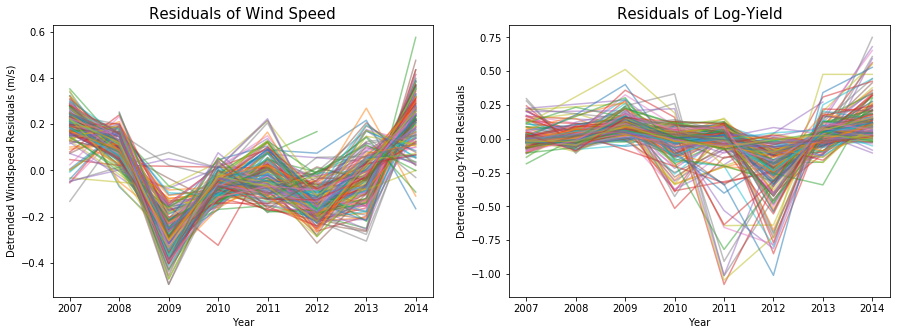

In [123]:
data_df = pd.DataFrame(columns = ['Year', 'County', 'LogYield', 'GDD', 'KDD', 'MeanWindspeed', "Windspeed2", "Windspeed3", 'Windspeed Residuals', 'LogYieldResiduals'])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i in range(len(counties)):
    data = df_mean[df_mean['ST_CO'] == counties[i].upper()].copy()
    covariates = data['Year'].astype(float).values.reshape(-1, 1)
    if len(data)==0:
        continue
    ys = data['MeanWindspeed'].astype(float)
    model = LinearRegression()
    model.fit(covariates, ys)
    y_preds = model.predict(covariates)
    residuals = ys - y_preds
    data.loc[:, 'MeanWindspeed'] = residuals # added this line!
    ax[0].plot(covariates, residuals, alpha = 0.5)
    ys2 = data['Log-Yield'].astype(float)
    model.fit(covariates, ys2)
    y_preds2 = model.predict(covariates)
    residuals2 = ys2 - y_preds2
    data.loc[:, 'LogYieldResiduals'] = residuals2 #added this line!
    ax[1].plot(covariates, residuals2, alpha = 0.5)
    data_df = data_df.append(data)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Detrended Windspeed Residuals (m/s)")
ax[0].set_title("Residuals of Wind Speed", fontsize=15)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Detrended Log-Yield Residuals")
ax[1].set_title("Residuals of Log-Yield", fontsize=15);

In [125]:
fig.savefig("mean_ws_residuals.png", dpi=300)

## Compute Growing and Killing Winds
As corn is pollinated largely through wind and not by insects, we include a growing wind factor to see if growing winds have some impact. Essentially we think that there is a small positive benefit to having slow moving winds from pollination/drying etc, but higher wind values are damaging

In [149]:
# We define the following metrics for growing and killing winds 
def kill_winds(windspeed, threshold):
    if windspeed <= threshold:
        return 0
    else:
        return windspeed - 15
kill_vectorized = np.vectorize(kill_winds)

def grow_winds(windspeed, threshold):
    if windspeed <= 2:
        return windspeed
    elif (windspeed>2) & (windspeed<threshold-2):
        return 2
    elif (windspeed <= threshold) & (windspeed > threshold-2):
        return threshold - windspeed
    else:
        return 0
grow_vectorized = np.vectorize(grow_winds)

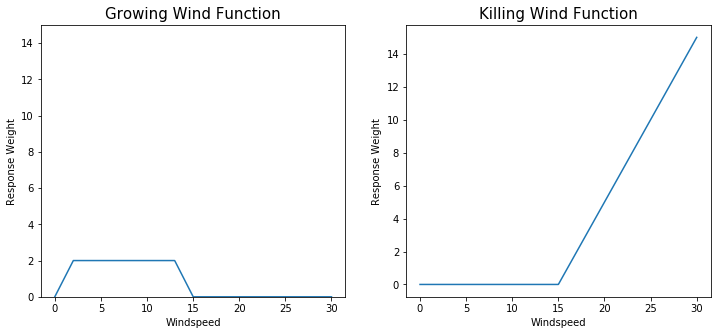

In [156]:
x = np.linspace(0,30, 2000)
y_grow = [grow_winds(t, 15) for t in x]
y_kill = [kill_winds(t, 15) for t in x]
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(x,y_grow)
ax[1].plot(x,y_kill)
ax[0].set_title("Growing Wind Function", fontsize=15)
ax[1].set_title("Killing Wind Function", fontsize=15)
ax[0].set_xlabel("Windspeed")
ax[1].set_xlabel("Windspeed")
ax[0].set_ylabel("Response Weight")
ax[1].set_ylabel("Response Weight");
ax[0].set_ylim((0,15))
fig.savefig("response_functions.png", dpi=300)